In [2]:
#built in librairies 
from tqdm import tqdm

# pip libraires
import numpy as np
import json
import pandas as pd


# visualization librairies
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing Librairies
import nltk
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
import re

# Visualization librairies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Calculating libraries
import scipy as sp

#statistical librairies
import pingouin 

# Import libraries
import requests
from bs4 import BeautifulSoup
import pickle


#from genres import genre_wordsets
import csv
import datetime  
from dateutil.relativedelta import relativedelta
from utils.genres import additional_wordsets
from pandas_profiling import ProfileReport

import pandas as pd 
import geopandas as gpd 
import geopy 
import matplotlib.pyplot as plt
from geopy.extra.rate_limiter import RateLimiter
import requests
from time import sleep
from random import randint
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

user_agent = 'user_me_{}'.format(randint(10000,99999))
locator = Nominatim(user_agent=user_agent)

geocode = RateLimiter(locator.geocode, min_delay_seconds=1.2)

In [3]:
"""read table tvtropes and process the data to get rid of json format
"""
summaries=pd.read_csv('./data/plot_summaries.txt',sep="\t",header=None)
summaries.rename(columns={0:'wikipedia_movie_id',1:'Plot_summaries'},inplace=True)
movies=pd.read_table('./data/movie.metadata.tsv',header=None)
movies.rename(columns={0:'wikipedia_movie_id',1:'rebase_movie_ID',2:'Movie_name',3:'Movie_release',4:'Box_office_revenue',5:'Movie_runtime',6:'Movie_language',7:'Movie_country',8:'Movie_genre'},inplace=True)

df_summaries = pd.merge(summaries, movies[['wikipedia_movie_id', 'Movie_name']], on='wikipedia_movie_id')
pd.set_option('max_colwidth', 200)

In [4]:
from ast import literal_eval

final_df = pd.read_csv('data/country_sentiment_stitch.csv', index_col=0)
final_df[['who','where','country','sentiment']] = final_df[['who','where','country','sentiment']].applymap(literal_eval)
print(len(final_df))
final_df[-10:]

42204


,wikipedia_movie_id,Plot_summaries,Movie_name,who,where,country,sentiment
42194,871575,"{{Plot}} In an alternate universe, people are addicted to an illegal simulation video game called Avalon. Despite its popularity, the game can leave a player catatonic. One player in the game, As...",Avalon,"{'Sister': {'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.5719}, 'Arthurian': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}",{},{},"{'neg': 0.097, 'neu': 0.844, 'pos': 0.059, 'compound': -0.9969}"
42195,17208834,"A high school prom in Georgia is unexpectedly interrupted when a graveyard, next to a power plant, becomes the sudden source of resuscitated cadavers. As zombies march on the high school, a motley...",Dance of the Dead,{},"{'Georgia': {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.5267}}","{'United States': {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.5267}}","{'neg': 0.164, 'neu': 0.754, 'pos': 0.082, 'compound': -0.9987}"
42196,29046736,"Lucy is working as a dancer in a sleazy strip joint. Her stage act includes a routine with a dwarf named Hercules . One night after the show, she invites Hercules into her dressing-room for a dri...",I Don't Want to Be Born,"{'Italian': {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.8074}}","{'Kensington': {'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'compound': 0.8074}, 'Italy': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'London': {'neg': 0.257, 'neu': 0.743, 'pos': 0.0, 'com...","{'United Kingdom': {'neg': 0.1285, 'neu': 0.763, 'pos': 0.1085, 'compound': 0.13255}, 'Italy': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}}","{'neg': 0.158, 'neu': 0.771, 'pos': 0.071, 'compound': -0.9983}"
42197,30352708,"Twenty-something Eun-mo listens to a taxi driver drone on as she rides down a foggy highway. The story then cycles back eight years earlier, when a lustful Joong-shik accidentally causes a woman t...",Paju,"{'North Korean': {'neg': 0.148, 'neu': 0.852, 'pos': 0.0, 'compound': -0.6369}, 'North Koreans': {'neg': 0.057, 'neu': 0.795, 'pos': 0.148, 'compound': 0.4939}}","{'Paju': {'neg': 0.074, 'neu': 0.8714999999999999, 'pos': 0.0545, 'compound': -0.11750000000000002}, 'Seoul': {'neg': 0.148, 'neu': 0.852, 'pos': 0.0, 'compound': -0.6369}}","{'South Korea': {'neg': 0.09866666666666667, 'neu': 0.8649999999999999, 'pos': 0.036333333333333336, 'compound': -0.29063333333333335}}","{'neg': 0.1, 'neu': 0.824, 'pos': 0.076, 'compound': -0.6249}"
42198,2867597,"An attempt to bring the famed ""Mr. Bill"" clay characters to ""life"" in a sitcom format, this Showtime special featured Mr. Bill , his wife and son , as well as his next-door neighbor, Sluggo ([[Mi...",Mr. Bill's Real Life Adventures,{},{},{},"{'neg': 0.045, 'neu': 0.819, 'pos': 0.136, 'compound': 0.875}"
42199,34808485,"The story is about Reema , a young Muslim schoolgirl in Malabar, who loved Malayalam and poetry. The film is about her mental trauma once she was moved to an English medium school by her parents, ...",Oomakkuyil Padumbol,"{'Muslim': {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.5994}}","{'Malabar': {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.5994}}","{'United States': {'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.5994}}","{'neg': 0.063, 'neu': 0.85, 'pos': 0.087, 'compound': 0.2732}"
42200,1096473,"In 1928 Hollywood, director Leo Andreyev looks through photographs for actors for his next movie. When he comes to the picture of an aged Sergius Alexander , he pauses, then tells his assistant ...",The Last Command,"{'Czarist': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'Bolsheviks': {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.4215}, 'Russian': {'neg': 0.322, 'neu': 0.678, 'pos': 0.0, ...","{'Hollywood': {'neg': 0.09, 'neu': 0.9099999999999999, 'pos': 0.0, 'compound': -0.2553}, 'Russia': {'neg': 0.09233333333333334, 'neu': 0.715, 'pos': 0.19299999999999998, 'compound': 0.139466666666...","{'United States': {'neg': 0.09, 'neu

In [7]:
df_summaries = final_df
movies_copy = movies.copy()


movies_copy['Movie_release'] = pd.to_datetime(movies_copy['Movie_release'], errors = 'coerce').dt.year
df_summaries_dated = pd.merge(df_summaries, movies_copy[['wikipedia_movie_id', 'Movie_release', 'Movie_country', 'Movie_name']], on='wikipedia_movie_id')
df_summaries_dated['countries'] = df_summaries_dated['country'].apply(lambda x : list(x.keys()))
df_summaries_dated['where_key'] = df_summaries_dated['where'].apply(lambda x : str(list(x.keys())))
df_summaries_dated['country_sentiment'] = df_summaries_dated['country'].apply(lambda x : [list(dict(k).values())[3] for k in list(x.values())] if len(x.values()) else [])
df_summaries_dated['general_sentiment'] = df_summaries_dated['sentiment'].apply(lambda x : list(dict(x).values())[3])
df_summaries_dated['positive_sentiment'] = df_summaries_dated['sentiment'].apply(lambda x : list(dict(x).values())[2])
df_summaries_dated['negative_sentiment'] = df_summaries_dated['sentiment'].apply(lambda x : list(dict(x).values())[0])
df_summaries_dated['Movie_country'] = df_summaries_dated['Movie_country'].apply(lambda x : literal_eval(x).values())

df_summaries_dated = df_summaries_dated[['wikipedia_movie_id', 'Movie_name_y', 'Movie_country', 'Movie_release', 'countries', 'country_sentiment', 'where_key', 'general_sentiment', 'positive_sentiment', 'negative_sentiment']].sort_values(by=['Movie_release', 'wikipedia_movie_id'], ascending= False)

##
'''t = df_summaries_dated.copy()
t['c2'] = t['countries'].astype(str)
t = t.set_index(['wikipedia_movie_id', 'Movie_release', 'where_key', 'c2']).apply(pd.Series.explode).reset_index()
t = t[t['countries'] == 'Other']
t = t[t["Movie_release"] == 1984][['where_key', 'c2']]
print(t)'''

##

df_summaries_dated = df_summaries_dated.set_index(['wikipedia_movie_id', 'Movie_release', 'where_key', 'general_sentiment', 'Movie_country','Movie_name_y', 'positive_sentiment', 'negative_sentiment']).apply(pd.Series.explode).reset_index()

df_summaries_dated['production'] = 1
#print(df_summaries_dated.head(10))

In [8]:
df_summaries_dated

,wikipedia_movie_id,Movie_release,where_key,general_sentiment,Movie_country,Movie_name_y,positive_sentiment,negative_sentiment,countries,country_sentiment,production
0,36724342,2014.0,"['Queensland', 'Australia', 'Fraser Coast|url15', 'California']",0.2263,"(Australia, United Kingdom)",Saving Mr. Banks,0.046,0.034,Australia,0.075433,1
1,36724342,2014.0,"['Queensland', 'Australia', 'Fraser Coast|url15', 'California']",0.2263,"(Australia, United Kingdom)",Saving Mr. Banks,0.046,0.034,Other,0.0,1
2,36724342,2014.0,"['Queensland', 'Australia', 'Fraser Coast|url15', 'California']",0.2263,"(Australia, United Kingdom)",Saving Mr. Banks,0.046,0.034,United States,0.2263,1
3,36534974,2014.0,[],0.5994,(United States of America),Noah,0.111,0.059,NaN,NaN,1
4,36351451,2014.0,[],0.4939,(United Kingdom),The Elder,0.115,0.077,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
54789,276762,NaN,[],-0.4215,(United States of America),Mickey's Revue,0.056,0.093,NaN,NaN,1
54790,235299,NaN,[],-0.9731,(United States of America),The Orphan's Benefit,0.066,0.108,NaN,NaN,1
54791,169988,NaN,[],0.7618,(),"It's Magic, Charlie Brown",0.073,0.082,NaN,NaN,1
54792,143554,NaN,[],0.9022,(),The Larry Sanders Show,0.091,0.015,NaN,NaN,1


In [9]:
movies_per_year = pd.DataFrame()
movies_per_year["count"] = movies_copy.groupby(['Movie_release']).wikipedia_movie_id.count()
print(movies_per_year)

#############

#mask = df_summaries_dated.Movie_country.apply(lambda x: 'China' in x)
#df_summaries_dated = df_summaries_dated[mask]

               count
Movie_release       
1888.0             1
1889.0             1
1890.0             2
1891.0             3
1892.0             3
...              ...
2012.0          1194
2013.0           164
2014.0            17
2015.0             4
2016.0             3

[129 rows x 1 columns]


['United States', 'United Kingdom', 'France', 'India', 'Other']


<AxesSubplot:xlabel='Movie_release'>

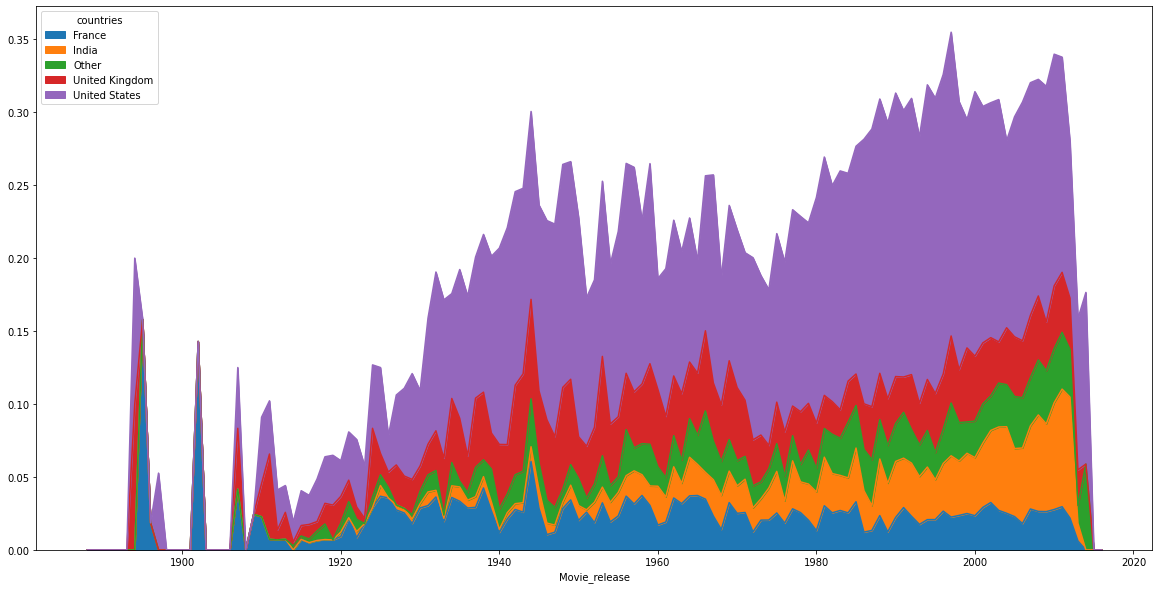

In [10]:
nbr_countries = 5

########
pt = pd.pivot_table(df_summaries_dated, columns=['countries'], index=['Movie_release'], values=['production'], aggfunc=np.sum)

pt = pt.divide(movies_per_year["count"], axis='index')

s = pt.sum(axis = 'index')
indx = list(s.sort_values(ascending=False).index[:nbr_countries].get_level_values('countries'))
print(indx)
pt.columns = pt.columns.get_level_values('countries')
pt = pt[np.intersect1d(pt.columns, indx)]

pt.fillna(0).plot.area(stacked=True, figsize=(20, 10))

<AxesSubplot:xlabel='Movie_release'>

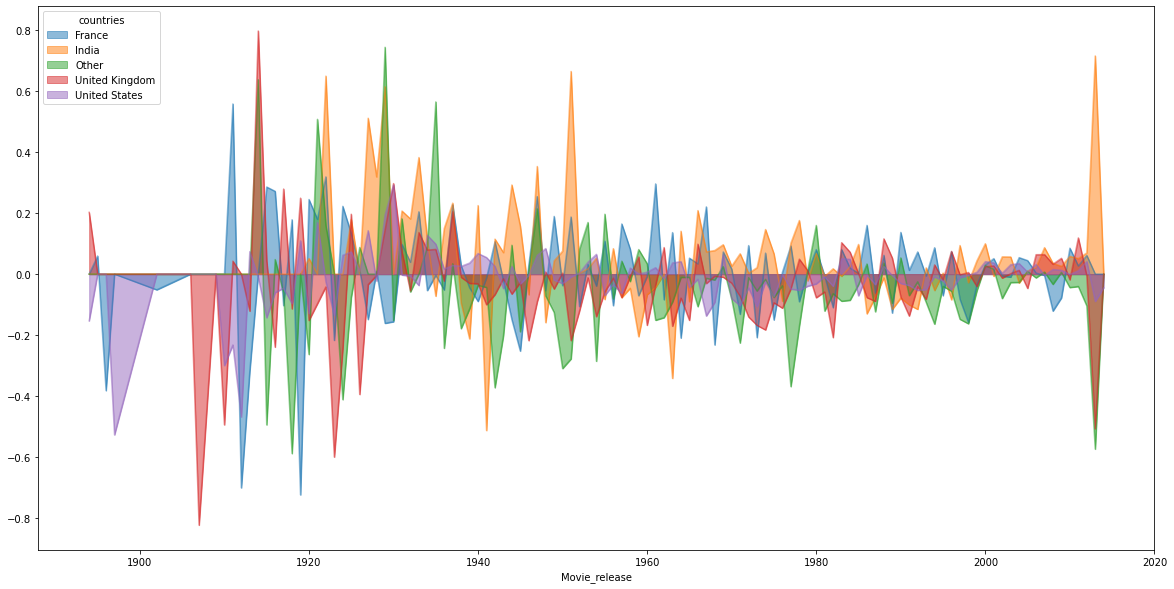

In [11]:
# split data into negative and positive values

pt1 = pd.pivot_table(df_summaries_dated, columns=['countries'], index=['Movie_release'], values=['country_sentiment'], aggfunc=np.mean)
pt1.columns = pt1.columns.get_level_values('countries')
pt1 = pt1[np.intersect1d(pt1.columns, indx)]

pt1.fillna(0).plot.area(stacked=False, figsize=(20, 10))

<AxesSubplot:xlabel='Movie_release'>

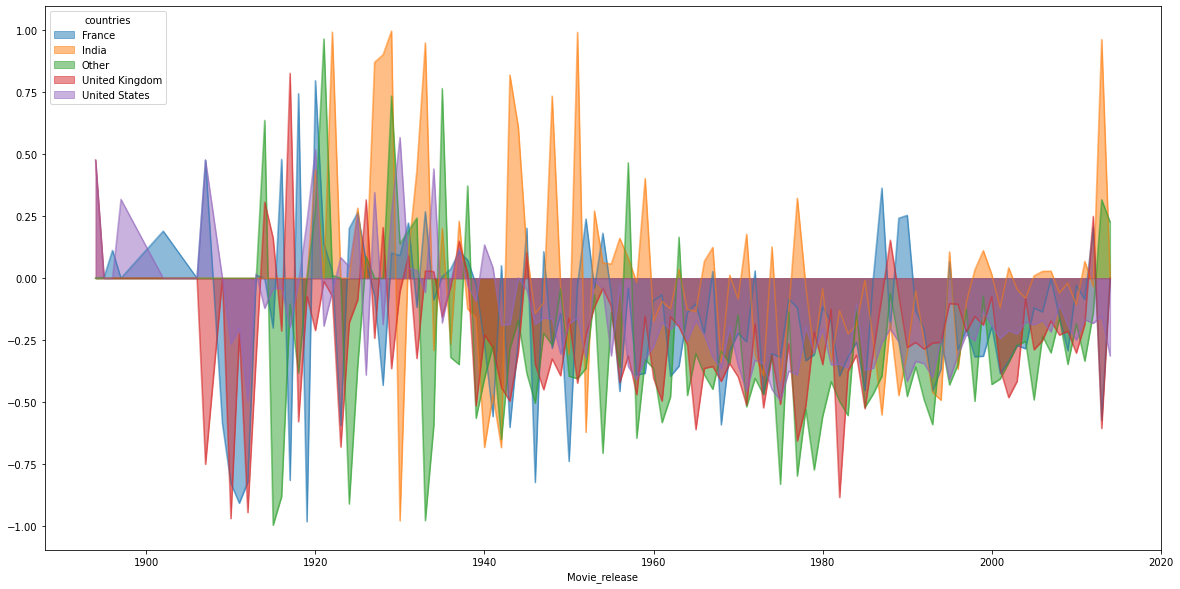

In [12]:
# split data into negative and positive values

pt1 = pd.pivot_table(df_summaries_dated, columns=['countries'], index=['Movie_release'], values=['general_sentiment'], aggfunc=np.mean)
pt1.columns = pt1.columns.get_level_values('countries')
pt1 = pt1[np.intersect1d(pt1.columns, indx)]

pt1.fillna(0).plot.area(stacked=False, figsize=(20, 10))

<AxesSubplot:xlabel='Movie_release'>

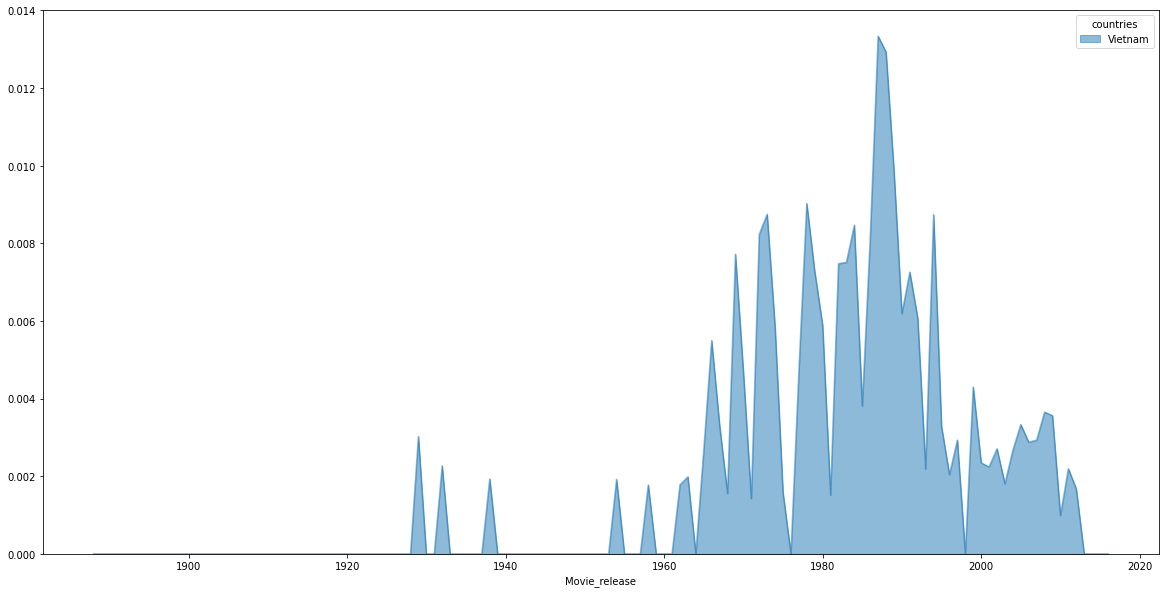

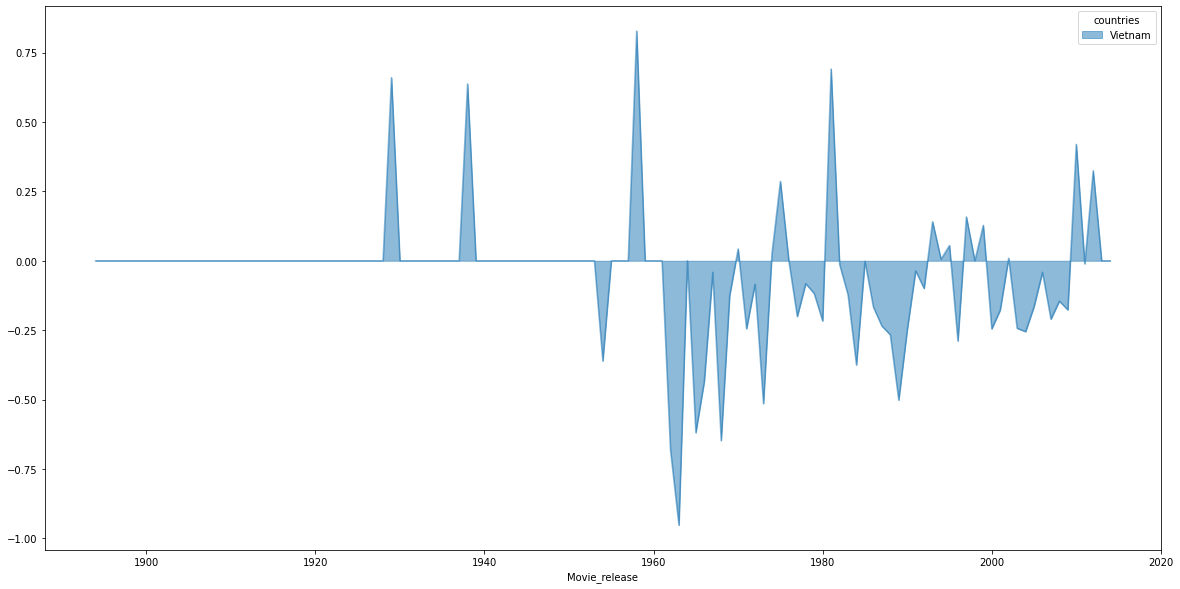

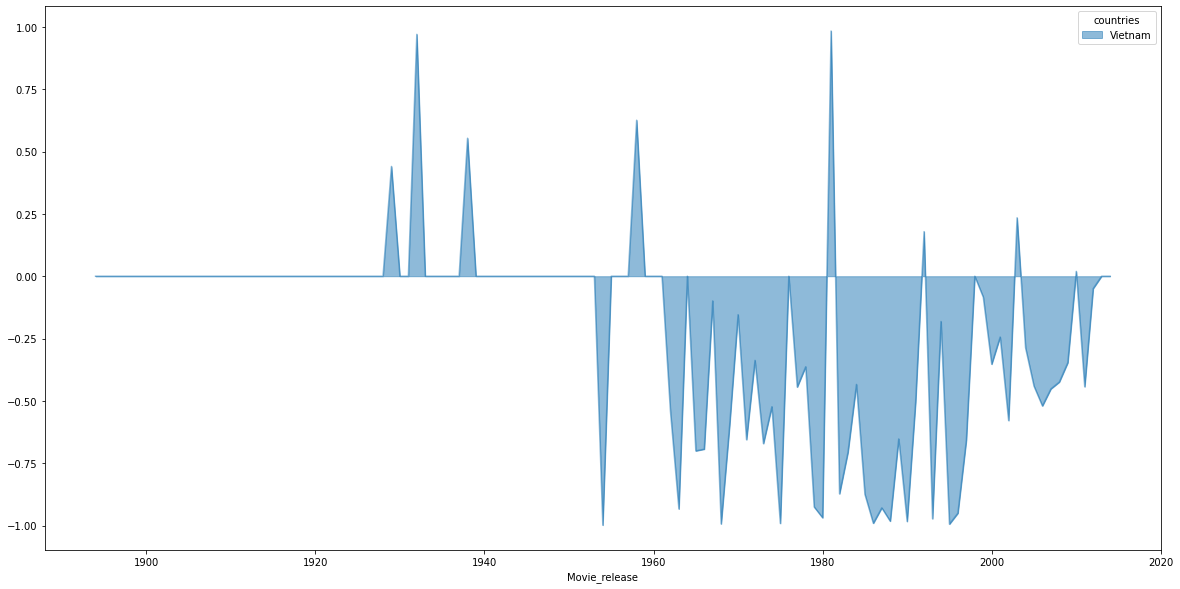

In [13]:
pt = pd.pivot_table(df_summaries_dated, columns=['countries'], index=['Movie_release'], values=['production'], aggfunc=np.sum)
pt1 = pd.pivot_table(df_summaries_dated, columns=['countries'], index=['Movie_release'], values=['country_sentiment'], aggfunc=np.mean)
pt2 = pd.pivot_table(df_summaries_dated, columns=['countries'], index=['Movie_release'], values=['general_sentiment'], aggfunc=np.mean)
pt.columns = pt.columns.get_level_values('countries')
pt1.columns = pt1.columns.get_level_values('countries')
pt2.columns = pt2.columns.get_level_values('countries')

pt = pt.divide(movies_per_year["count"], axis='index')

pt = pt[["Vietnam"]]
pt1 = pt1[["Vietnam"]]
pt2 = pt2[["Vietnam"]]

pt.fillna(0).plot.area(figsize=(20, 10), stacked=False)
pt1.fillna(0).plot.area(stacked=False, figsize=(20, 10))
pt2.fillna(0).plot.area(stacked=False, figsize=(20, 10))


In [14]:
sentiment_threshhold = 0.2

df_summaries_dated['pos'] = df_summaries_dated['general_sentiment'] > sentiment_threshhold
df_summaries_dated['neg'] = (-1)*(df_summaries_dated['general_sentiment'] < -sentiment_threshhold)

pt_pos = pd.pivot_table(df_summaries_dated, columns=['countries'], index=['Movie_release'], values=['pos'], aggfunc=np.sum)
pt_neg = pd.pivot_table(df_summaries_dated, columns=['countries'], index=['Movie_release'], values=['neg'], aggfunc=np.sum)
pt = pd.pivot_table(df_summaries_dated, columns=['countries'], index=['Movie_release'], values=['production'], aggfunc=np.sum)

pt_pos.columns = pt_pos.columns.get_level_values('countries')
pt_neg.columns = pt_neg.columns.get_level_values('countries')
pt.columns = pt.columns.get_level_values('countries')

pt_pos = pt_pos.divide(pt, axis='index').fillna(0)
pt_neg = pt_neg.divide(pt, axis='index').fillna(0)

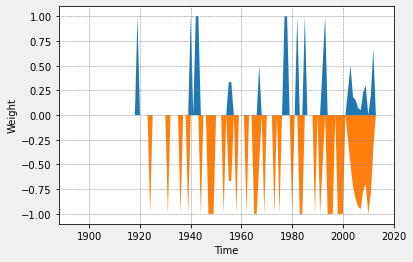

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, facecolor="#F0F0F0")
ax.stackplot(pt_pos.index, pt_pos.Iraq)
ax.stackplot(pt_pos.index, pt_neg.Iraq)

ax.set_xlabel("Time")
ax.set_ylabel("Weight")
ax.grid(which="major", color="grey", linestyle="--", linewidth=0.5)

plt.show()

In [16]:
region_map = pd.read_csv('./data/country_regions.csv',sep=",", header=0)

In [17]:

location_region_map = pd.DataFrame(region_map['region'].unique(), columns =['region'])
location_region_map['address'] = location_region_map['region'].apply(geocode)
location_region_map['coordinates'] = location_region_map['address'].apply(lambda loc: tuple(loc.point) if loc else None)

In [18]:
location_country_map = pd.DataFrame(df_summaries_dated['countries'].unique(), columns =['countries'])
print(len(location_country_map))
location_country_map['address'] = location_country_map['countries'].apply(geocode)
location_country_map['coordinates'] = location_country_map['address'].apply(lambda loc: tuple(loc.point) if loc else None)

209


In [19]:
location_country_map[['latitude', 'longitude', 'altitude']] = pd.DataFrame(location_country_map['coordinates'].tolist(), index=location_country_map.index)
location_country_map.latitude.isnull().sum()
location_country_map = location_country_map[pd.notnull(location_country_map['latitude'])]

df_summaries_coordinates = df_summaries_dated.copy()
df_summaries_coordinates = pd.merge(df_summaries_coordinates, location_country_map, on = 'countries')
print(df_summaries_coordinates.head(20))
print(location_country_map["countries"])

    wikipedia_movie_id  Movie_release  \
0             36724342         2014.0   
1             35724504         2013.0   
2             29354037         2013.0   
3             36448673         2012.0   
4             36025071         2012.0   
5             35429216         2012.0   
6             35298790         2012.0   
7             34757217         2012.0   
8             33201358         2012.0   
9             32763008         2012.0   
10            31052221         2012.0   
11            29270563         2012.0   
12            33222541         2011.0   
13            33200310         2011.0   
14            33049275         2011.0   
15            32750551         2011.0   
16            32635381         2011.0   
17            31831869         2011.0   
18            31826551         2011.0   
19            31539054         2011.0   

                                                                    where_key  \
0             ['Queensland', 'Australia', 'Fraser Coast|u

In [20]:
location_region_map[['latitude', 'longitude', 'altitude']] = pd.DataFrame(location_region_map['coordinates'].tolist(), index=location_region_map.index)
location_region_map.latitude.isnull().sum()
location_region_map = location_region_map[pd.notnull(location_region_map['latitude'])]
df_summaries_region = df_summaries_dated.copy()
df_summaries_region['region'] = df_summaries_region['countries'].map(region_map.set_index('countries')['region'])
#df_summaries_region['coordinates'] = df_summaries_region['region'].map(location_map.set_index('regions')['coordinates'])

df_summaries_region = pd.merge(df_summaries_region, location_region_map, on = 'region')
print(location_region_map["region"])
print(df_summaries_region)

0            Middle East
1           Soviet union
2                 Africa
3                Oceania
4                   PIGS
5          North America
6          Latin America
7     Continental Europe
8             South Asia
9        South East Asia
10             East Asia
11            North Asia
12           Scandinavia
Name: region, dtype: object
       wikipedia_movie_id  Movie_release  \
0                36724342         2014.0   
1                35724504         2013.0   
2                29354037         2013.0   
3                36448673         2012.0   
4                36025071         2012.0   
...                   ...            ...   
32618             7853164            NaN   
32619             7623911            NaN   
32620             4724834            NaN   
32621             4724834            NaN   
32622             2393755            NaN   

                                                             where_key  \
0      ['Queensland', 'Australia', 'Fraser C

In [21]:
df_summaries_region.to_csv('df_summaries_region.csv')

In [22]:
import pandas as pd
df_summaries_region = pd.read_csv('df_summaries_region.csv', index_col=0)

df_region_grouped = df_summaries_region.groupby(['Movie_release', 'region']).sum().reset_index()
df_region_grouped[['general_sentiment', 'pos', 'neg', 'positive_sentiment', 'negative_sentiment']] = \
    df_region_grouped[['general_sentiment', 'pos', 'neg', 'positive_sentiment', 'negative_sentiment']].div(df_region_grouped['production'], axis=0)

prod_by_year = df_region_grouped.groupby(['Movie_release']).sum().reset_index()
df_region_grouped['production'] /= df_region_grouped['Movie_release'].map(prod_by_year.set_index('Movie_release')['production'])

df_country_grouped = df_summaries_region.groupby(['Movie_release', 'countries']).sum().reset_index()
df_country_grouped[['general_sentiment', 'pos', 'neg', 'positive_sentiment', 'negative_sentiment']] = \
    df_country_grouped[['general_sentiment', 'pos', 'neg', 'positive_sentiment', 'negative_sentiment']].div(df_country_grouped['production'], axis=0)

df_country_grouped['production'] /= df_country_grouped['Movie_release'].map(prod_by_year.set_index('Movie_release')['production'])


In [23]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output, State

color_chart = px.colors.qualitative.Plotly

country_checklist = [['United States', 'United Kingdom', 'France', 'India', 'Germany', 'Australia', 'Italy', 'China', 'Japan', 'Canada', 'Mexico', 'Spain', 'Russia', 'Iraq', 'Vietnam', 'Netherlands', 'Austria', 'Luzon', 'Turkey', 'Switzerland', 'South Korea', 'Brazil', 'Poland', 'Sweden', 'Egypt', 'Israel', 'Argentina', 'Afghanistan', 'New Zealand'],
 ['Vietnam', 'Afghanistan', 'Iraq']]

region_checklist = [[
'Middle East',
'Soviet union',
'Africa',
'Oceania',
'PIGS',
'North America',
'Latin America',
'Continental Europe',
'South Asia',
'South East Asia',
'East Asia',
'North Asia',
'Scandinavia',], ['South Asia', 'Middle East', 'Continental Europe']]

app_areaplot = JupyterDash(__name__)

app_areaplot.layout = html.Div([
    html.H4("Country's key performance analytics"),
    html.P("Select country or region mode."),
    dcc.Dropdown(
        id='country_continent',
        options=['Country', 'Regions'],
        value='Country'
    ),
    html.P("Select desired countries.", id = "country_continent_text"),
    dcc.Checklist([],[],
      id='checklist',
      labelStyle={'display': 'block'},
      style={'columnCount': 7}
      ),
    html.P("Select sentiment or movie production analysis."),
    dcc.Dropdown(
        id='sentiment_prod',
        options=['Sentiment', 'Production'],
        value='Sentiment'
    ),
    dcc.Graph(id="graph"),
])

@app_areaplot.callback(
    [Output("checklist", 'options'),
    Output("checklist", 'value'),
    Output("country_continent_text", "children"), ],
    Input("country_continent", "value"))
def change_mode(contry_continent):
    if contry_continent == "Country":
        
        text = "Select desired countries."
        return country_checklist[0], country_checklist[1], text
    else :
        
        text = "Select desired regions."
        return region_checklist[0], region_checklist[1], text

@app_areaplot.callback(
    Output("graph", "figure"),  
    [Input("country_continent", "value"),
    Input("checklist", "value"),
    Input("sentiment_prod", "value")])
def display_area(contry_continent, checks, sentiment_prod):
    
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    df = pd.DataFrame()
    
    if contry_continent == "Country":
        mode = "countries"
        df = df_country_grouped[df_country_grouped[mode].isin(checks)].fillna(0)
    else :
        mode = "region"
        df = df_region_grouped[df_region_grouped[mode].isin(checks)].fillna(0)

    if sentiment_prod == "Sentiment":
        axis_label = "Average positive(y>0) and negative(y<0) <br> sentiment score."
        for i, c in enumerate(checks):

            fig.add_trace(go.Scatter(
                name = c,
                x = df[df[mode] == c]["Movie_release"],
                y = df[df[mode] == c]["pos"],
                line_color= color_chart[i],
                fillcolor= color_chart[i],
                legendgroup= i,
                stackgroup='one',
            ))

            fig.add_trace(go.Scatter(
                name = c,
                x = df[df[mode] == c]["Movie_release"],
                y = df[df[mode] == c]["neg"],
                line_color= color_chart[i],
                fillcolor= color_chart[i],
                legendgroup= i,
                showlegend=False,
                stackgroup='two'
            ))
    else :
        axis_label = "Ratio of movies produced in a country <br> by total productions."
        for c in checks:

            fig.add_trace(go.Scatter(
                name = c,
                x = df[df[mode] == c]["Movie_release"],
                y = df[df[mode] == c]["production"],
                showlegend=True,
                legendgroup= 0,
                stackgroup='three'
            ))
    fig.update_layout(
    title="Evolution of movie " + str(sentiment_prod) + " by " + str(contry_continent),
    xaxis_title="Year",
    yaxis_title= axis_label,
    legend_title=str(contry_continent),
    )

    fig.add_hline(y=0, line_width=1, line_color="black")
    return fig


In [24]:
app_areaplot.run_server(mode = "external")

Dash app running on http://127.0.0.1:8050/


In [23]:
import json

feature_collection = {
    'type': 'FeatureCollection',
    'features': []
}

# Loop through the rows of the DataFrame
for _, row in df_summaries_coordinates.iterrows():
    # Create a feature
    feature = {
        'type': 'Feature',
        'properties': {
            'time': row['Movie_release'],
            'description': row['countries'],
            'sentiment':row['general_sentiment'],
            'name': row['Movie_name_y'],
        },
        'geometry': {
            'type': 'Point',
            'coordinates': [row['longitude'], row['latitude']]
        }
    }

    # Add the feature to the feature collection
    feature_collection['features'].append(feature)

In [27]:
df_summaries_coordinates.to_csv('df_summaries_coordinates.csv')

In [28]:
import pandas as pd
df_summaries_coordinates = pd.read_csv('df_summaries_coordinates.csv', index_col=0)

In [29]:
import dash_leaflet as dl
import dash_leaflet.express as dlx
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html, Input, Output
from dash_extensions.javascript import assign
from dash.exceptions import PreventUpdate
import dash

slider_year = 2000
range_year = 1995

card_type = dl.TileLayer(
                            url='https://tiles.stadiamaps.com/tiles/alidade_smooth_dark/{z}/{x}/{y}{r}.png',
                            attribution='&copy; <a href="https://stadiamaps.com/">Stadia Maps</a>, &copy; <a href="https://openmaptiles.org/">OpenMapTiles</a> &copy; <a href="http://openstreetmap.org">OpenStreetMap</a> contributors',
                        )

df_summaries_coordinates = df_summaries_coordinates[df_summaries_coordinates['Movie_release'] >= 1900]
df_summaries_coordinates=df_summaries_coordinates.dropna(subset=['countries','latitude'])

colorscale = ['red', 'yellow', 'green']

chroma = "https://cdnjs.cloudflare.com/ajax/libs/chroma-js/2.1.0/chroma.min.js"  # js lib used for colors
color_prop = 'general_sentiment' # property to color by

# Create a colorbar.
vmax = 1
vmin = -1
colorbar = dl.Colorbar(colorscale=colorscale, width=20, height=150, min=-1, max=1, unit=' sentiment score', style= {'color': 'white'})


# Geojson rendering logic, must be JavaScript as it is executed in clientside.
point_to_layer = assign("""
function(feature, latlng, context){
    const {min, max, colorscale, circleOptions, colorProp} = context.props.hideout;
    const csc = chroma.scale(colorscale).domain([min, max]);  // chroma lib to construct colorscale
    circleOptions.fillColor = csc(feature.properties[colorProp]);  // set color based on color prop.
    return L.circleMarker(latlng, circleOptions);  // sender a simple circle marker.
}""")

cluster_to_layer = assign("""function(feature, latlng, index, context){
    const {min, max, colorscale, circleOptions, colorProp} = context.props.hideout;
    const csc = chroma.scale(colorscale).domain([min, max]);

    // Set color based on mean value of leaves.
    const leaves = index.getLeaves(feature.properties.cluster_id);
    let valueSum = 0;
    for (let i = 0; i < leaves.length; ++i) {
        valueSum += leaves[i].properties[colorProp]
    }
    const valueMean = valueSum / leaves.length;
    
    // Render a circle with the number of leaves written in the center.
    const icon = L.divIcon.scatter({
        html: '<div style="background-color:white;"><span>' + feature.properties.point_count_abbreviated + '</span></div>',
        className: "marker-cluster",
        iconSize: L.point(40, 40),
        color: csc(valueMean)
    });
    return L.marker(latlng, {icon : icon})
}""")

def get_data(subset):

    # Pre process the data into geobuf.
    dicts = subset.to_dict('rows')

    for row in dicts:
        row["tooltip"] = "{} ({:.1f})".format(str(int(row['Movie_release'])) + ',  ' + row['Movie_name_y'] + ' ', row[color_prop])  # bind tooltip

    geojson = dlx.dicts_to_geojson(dicts, lon="longitude", lat = "latitude")  # convert to geojson
    geobuf = dlx.geojson_to_geobuf(geojson)  # convert to geobuf

    # Create geojson.
    geojson = dl.GeoJSON(data=geobuf, id="geojson", format="geobuf",
                        zoomToBounds=True,  # when true, zooms to bounds when data changes
                        cluster=True,  # when true, data are clustered
                        clusterToLayer=cluster_to_layer,  # how to draw clusters
                        zoomToBoundsOnClick=True,  # when true, zooms to bounds of feature (e.g. cluster) on click
                        options=dict(pointToLayer=point_to_layer),  # how to draw points
                        superClusterOptions=dict(radius=120),   # adjust cluster size
                        hideout=dict(colorProp=color_prop, circleOptions=dict(fillOpacity=1, stroke=False, radius=5),
                                    min=vmin, max=vmax, colorscale=colorscale))

    return [card_type, geojson, colorbar]


In [30]:
# Create the app.
app = JupyterDash(external_scripts=[chroma], prevent_initial_callbacks=True)

##########################

map_layer = html.Div([

    dl.Map(get_data(df_summaries_coordinates[df_summaries_coordinates['Movie_release'].between(range_year, slider_year)]),

     id='world_map', zoom = 4, center=(40.0884, -3.68042)),

], style={'width': '100%', 'height': '80vh', 'margin': "auto", "display": "block", "position": "relative"})

app.layout = html.Div([
    html.P("Select Year Range to analyze the sentiment and filming location of the movies in those years."),

    dcc.Checklist(
    ['Fixed Range'],
    [],
    id='fixed_range',
    ),

    dcc.RangeSlider(min=1900, max=2015,
      step=1, value=[range_year, slider_year],
      marks={i: '{}'.format(i) for i in range(1900, 2015, 5)},
      tooltip={"placement": "bottom", "always_visible": True},
      id='range_slider',
    ),
      
      
    map_layer
])

range_difference = 5

@app.callback(
    [Output("world_map", "children"),
    Output("range_slider", "value")],

    [Input("range_slider", "value"),
    Input("fixed_range", "value")],)
def display_area(year_range, fixed_value):

    global slider_year
    global range_difference
    new_range = []

    if len(fixed_value) == 0 :
        range_difference = year_range[1] - year_range[0]
        return get_data(df_summaries_coordinates[df_summaries_coordinates['Movie_release'].between(year_range[0], year_range[1])]), [year_range[0], year_range[1]]

    else:
        if slider_year != year_range[0] :
            new_range = [year_range[0], year_range[0] + range_difference]
            slider_year = new_range[0]
            
        elif slider_year + range_difference != year_range[1] :
            new_range = [year_range[1] - range_difference, year_range[1]]
            slider_year = new_range[0]

        return get_data(df_summaries_coordinates[df_summaries_coordinates['Movie_release'].between(new_range[0], new_range[1])]), [new_range[0], new_range[1]]


C:\Users\nicte\AppData\Local\Temp/ipykernel_16824/4112677391.py:66: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  dicts = subset.to_dict('rows')


In [31]:
app.run_server(mode='external', port=8060)

Dash app running on http://127.0.0.1:8060/


C:\Users\nicte\AppData\Local\Temp/ipykernel_16824/4112677391.py:66: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

